In [1]:
### Data Collection
import pandas_datareader as pdr

In [2]:
from datetime import datetime

In [3]:
key="59d0b45c3457202b13acc520aad3f83c43d5c84a"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
# df = pdr.get_data_tiingo('GOOGL', api_key=key)

C:\Users\wbsho\Anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')
# df.to_csv('GOOGL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')
# df=pd.read_csv('GOOGL.csv')
# df=pd.read_csv('BTC-USD.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-18 00:00:00+00:00,109.08,109.60,109.02,109.230,21984703,25.570292,25.692189,25.556227,25.605454,87938812,0.0,1.0
1,AAPL,2016-08-19 00:00:00+00:00,109.36,109.69,108.36,108.770,25368072,25.635929,25.713286,25.401511,25.497622,101472288,0.0,1.0
2,AAPL,2016-08-22 00:00:00+00:00,108.51,109.10,107.85,108.860,25820230,25.436673,25.574980,25.281958,25.518720,103280920,0.0,1.0
3,AAPL,2016-08-23 00:00:00+00:00,108.85,109.32,108.53,108.590,21257669,25.516376,25.626552,25.441362,25.455427,85030676,0.0,1.0
4,AAPL,2016-08-24 00:00:00+00:00,108.03,108.75,107.68,108.565,23675081,25.324153,25.492934,25.242107,25.449566,94700324,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-08-10 00:00:00+00:00,145.60,147.7100,145.30,146.440,69023081,145.60,147.7100,145.30,146.440,69023081,0.0,1.0
1253,AAPL,2021-08-11 00:00:00+00:00,145.86,146.7200,145.53,146.050,48493463,145.86,146.7200,145.53,146.050,48493463,0.0,1.0
1254,AAPL,2021-08-12 00:00:00+00:00,148.89,149.0500,145.84,146.190,73779113,148.89,149.0500,145.84,146.190,73779113,0.0,1.0
1255,AAPL,2021-08-13 00:00:00+00:00,149.10,149.4444,148.27,148.970,58846293,149.10,149.4444,148.27,148.970,58846293,0.0,1.0
1256,AAPL,2021-08-16 00:00:00+00:00,151.12,151.1900,146.47,148.535,103558782,151.12,151.1900,146.47,148.535,103558782,0.0,1.0


In [10]:

df1=df.reset_index()['close']

In [11]:
df1.shape

(1257,)

In [12]:
df1

0       109.08
1       109.36
2       108.51
3       108.85
4       108.03
         ...  
1252    145.60
1253    145.86
1254    148.89
1255    149.10
1256    151.12
Name: close, Length: 1257, dtype: float64

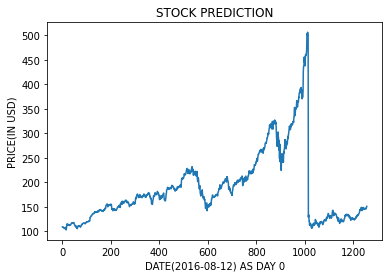

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('STOCK PREDICTION')
plt.ylabel('PRICE(IN USD)')
plt.xlabel('DATE(2016-08-12) AS DAY 0')
plt.plot(df1)

***LSTM are sensitive to the scale of the data. so we apply MinMax scaler***

In [14]:
df1

0       109.08
1       109.36
2       108.51
3       108.85
4       108.03
         ...  
1252    145.60
1253    145.86
1254    148.89
1255    149.10
1256    151.12
Name: close, Length: 1257, dtype: float64

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.01476573]
 [0.01546059]
 [0.0133512 ]
 ...
 [0.11355966]
 [0.1140808 ]
 [0.11909371]]


In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
len(train_data), len(test_data)

(817, 440)

In [20]:
train_data

array([[0.01476573],
       [0.01546059],
       [0.0133512 ],
       [0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.0267024 ],
       [0.02712428],
       [0.03206274],
       [0.03268314],
       [0.03526405],
       [0.03437066],
       [0.03598372],
       [0.03578519],
       [0.03558666],
       [0.03471809],
       [0.03456919],
       [0.03342764],
       [0.03603335],
       [0.037

# Data Preprocessing

In [21]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train)


[[0.01476573 0.01546059 0.0133512  ... 0.03667858 0.03935875 0.03965654]
 [0.01546059 0.0133512  0.01419496 ... 0.03935875 0.03965654 0.04124479]
 [0.0133512  0.01419496 0.01216002 ... 0.03965654 0.04124479 0.04000397]
 ...
 [0.23905599 0.23736847 0.23687215 ... 0.38244491 0.38787969 0.38964165]
 [0.23736847 0.23687215 0.22940242 ... 0.38787969 0.38964165 0.39475382]
 [0.23687215 0.22940242 0.23989974 ... 0.38964165 0.39475382 0.39415823]]


In [24]:
print(y_train)

[0.04124479 0.04000397 0.03948283 0.0418652  0.04184038 0.04131924
 0.0418652  0.04206373 0.04179075 0.04653067 0.04667957 0.04670439
 0.04591026 0.04521541 0.06357951 0.06303355 0.06439845 0.06740123
 0.07047846 0.07174409 0.07268712 0.07194262 0.07484614 0.07913937
 0.08035537 0.0799459  0.08087651 0.08330852 0.08432599 0.08288664
 0.08320925 0.08387929 0.08402819 0.09097677 0.08891701 0.09095196
 0.08986004 0.09030673 0.08901628 0.08822216 0.08936371 0.08951261
 0.08899146 0.09263947 0.09321024 0.0914731  0.0951211  0.09110085
 0.09502184 0.09378102 0.09308616 0.09368176 0.10092813 0.10172226
 0.10125074 0.1005807  0.10067997 0.10333532 0.10147409 0.1005807
 0.09978658 0.0993647  0.09554298 0.09596486 0.09410363 0.09603931
 0.09447588 0.09318543 0.09755311 0.09713123 0.10053107 0.10273973
 0.10063034 0.10090332 0.10055589 0.10782708 0.110135   0.10901826
 0.107703   0.11373337 0.123784   0.126216   0.12440441 0.12611674
 0.13145225 0.1304596  0.12988882 0.11693468 0.12261763 0.12390

In [25]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# reshaping is very very important here 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create a stack LSTM Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\wbsho\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wbsho\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wbsho\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wbsho\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
716/716 [==============================] - 10s 13ms/sample - loss: 0.0127 - val_loss: 0.0383
Epoch 2/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0026 - val_loss: 0.0320
Epoch 3/100
716/716 [==============================] - 6s 9ms/sample - loss: 0.0015 - val_loss: 0.0258
Epoch 4/100
716/716 [==============================] - 7s 10ms/sample - loss: 8.3365e-04 - val_loss: 0.0197
Epoch 5/100
716/716 [==============================] - 7s 10ms/sample - loss: 5.0845e-04 - val_loss: 0.0231
Epoch 6/100
716/716 [==============================] - 7s 10ms/sample - loss: 4.4941e-04 - val_loss: 0.0198
Epoch 7/100
716/716 [==============================] - 8s 11ms/sample - loss: 4.6235e-04 - val_loss: 0.0197
Epoch 8/100
716/716 [==============================] - 7s 10ms/sample - loss: 4.1474e-04 - val_loss: 0.0207
Epoch 9/1

Epoch 73/100
716/716 [==============================] - 8s 12ms/sample - loss: 1.4520e-04 - val_loss: 0.0097
Epoch 74/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.4272e-04 - val_loss: 0.0093
Epoch 75/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.4269e-04 - val_loss: 0.0093
Epoch 76/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.4040e-04 - val_loss: 0.0091
Epoch 77/100
716/716 [==============================] - 8s 11ms/sample - loss: 1.4347e-04 - val_loss: 0.0089
Epoch 78/100
716/716 [==============================] - 8s 12ms/sample - loss: 1.4401e-04 - val_loss: 0.0091
Epoch 79/100
716/716 [==============================] - 8s 12ms/sample - loss: 1.4936e-04 - val_loss: 0.0086
Epoch 80/100
716/716 [==============================] - 9s 12ms/sample - loss: 1.3502e-04 - val_loss: 0.0086
Epoch 81/100
716/716 [==============================] - 9s 13ms/sample - loss: 1.3539e-04 - val_loss: 0.0086
Epoch 82/100
716/71


# Predicting the test data and plot the output

In [32]:
import tensorflow as tf

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**Calculate RMSE performance metrics**

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

180.136875148632

***Test Data RMSE**

In [36]:

math.sqrt(mean_squared_error(ytest,test_predict))

215.7727158727659

***Plotting shift train predictions for plotting***

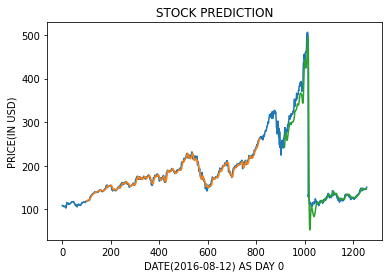

In [37]:

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('STOCK PREDICTION')
plt.ylabel('PRICE(IN USD)')
plt.xlabel('DATE(2016-08-12) AS DAY 0')
plt.show()

## Predicting the future 30 days output and plot the output

In [38]:
len(test_data)

440

In [39]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340480444709184,
 0.059484812388326425,
 0.0589884852094501,
 0.05886440341473104,
 0.054968235060551984,
 0.0533

**Logic code for 30 days output(Day-0 to Day 29)**

In [42]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11204682]
101
1 day input [0.04486798 0.04531467 0.04161703 0.04720071 0.04931011 0.05650685
 0.05727616 0.06147012 0.06757495 0.07411406 0.06975878 0.0776752
 0.07171928 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728
 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765
 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557
 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782
 0.10829859 0.10385646 0.10549434 0

12 day input [0.0776752  0.07171928 0.07784892 0.07700516 0.07869267 0.07439944
 0.07536728 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581
 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633
 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893 0.06035338
 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481
 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228
 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799
 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311
 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378
 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899
 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219
 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072
 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655
 0.10976276 0.10874528 0.10901826 0.10673516 0.10661108 0.10539508
 0.1060403  0.11355966 0.1140808  0.11909371 0.11

24 day output [[0.12136438]]
25 day input [0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557
 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782
 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276
 0.10874528 0.10901826 0.10673516 0.10661108 0.10539508 0.1060403
 0.11355966 0.1140808  0.11909371 0.11204682 0.11378834 0.11499589
 0.11573858 0.11617707 0.11645178 0.11665481 0.11683678 0.11702179
 0.11721984 0.11743437

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

1257

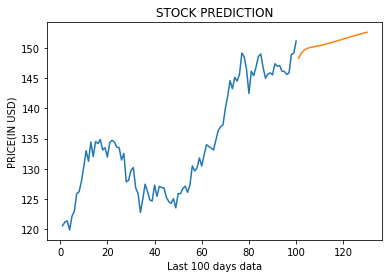

In [46]:
plt.title('STOCK PREDICTION')
plt.ylabel('PRICE(IN USD)')
plt.xlabel('Last 100 days data')
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# plt.savefig("12.png", bbox_inches ='tight', pad_inches=2)

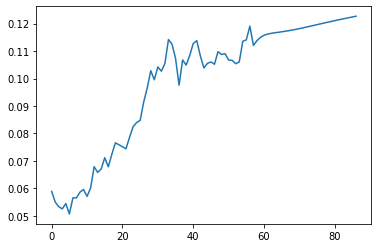

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

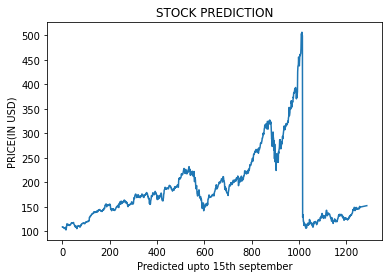

In [49]:
plt.title('STOCK PREDICTION')
plt.ylabel('PRICE(IN USD)')
plt.xlabel('Predicted upto 15th september')
plt.plot(df3)